In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
beijing = pd.read_csv('FiveCitiePMData/beijing.csv')
chengdu = pd.read_csv('FiveCitiePMData/chengdu.csv')
guangzhou = pd.read_csv('FiveCitiePMData/guangzhou.csv')
shanghai = pd.read_csv('FiveCitiePMData/shanghai.csv')
shenyang = pd.read_csv('FiveCitiePMData/shenyang.csv')

#### Beijing

In [3]:
city = beijing

In [4]:
x = pd.DataFrame(city[260:460], columns='DEWP'.split())

In [5]:
y = np.array(pd.DataFrame(city[260:460], columns='PRES'.split()))

### Linear regression with simple splitting

In [6]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
clf = LinearRegression()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
model = clf.fit(x_train, y_train)

In [10]:
predictions = clf.predict(x_test)

In [11]:
model.score(x_test, y_test)

0.25712246362702285

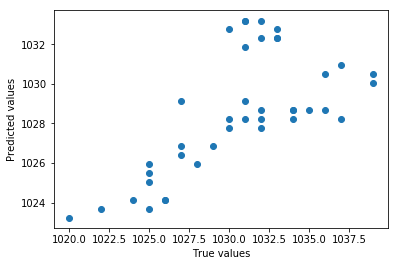

In [12]:
plt.scatter(y_test, predictions)
plt.xlabel('True values')
plt.ylabel('Predicted values')

### CV

#### Leave one out

In [13]:
from sklearn.model_selection import LeaveOneOut

In [14]:
mselector = LeaveOneOut()

In [15]:
mselector.get_n_splits(x)

200

In [16]:
mse = []

for train_index, test_index in mselector.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LinearRegression()
    model = clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    mse.append(model.score(x_test, y_test))

In [17]:
print(pd.DataFrame(mse).mean())

0    0.0
dtype: float64


In [18]:
from sklearn.model_selection import KFold

In [19]:
kf = KFold(n_splits=10)

In [20]:
mse = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LinearRegression()
    model = clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    mse.append(model.score(x_test, y_test))

In [21]:
print(pd.DataFrame(mse).mean())

0   -9.671338
dtype: float64


In [22]:
from sklearn.cross_validation import cross_val_predict, cross_val_score
from sklearn import metrics

/Users/someone/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-9.67133806695


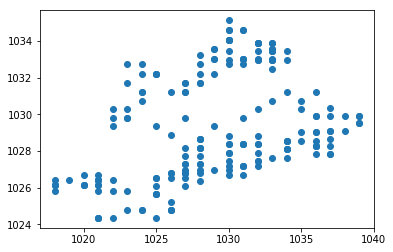

In [27]:
model = LinearRegression()
model.fit(x, y)
scores = cross_val_score(LinearRegression(), x, y, cv=10)
predict = cross_val_predict(LinearRegression(), x, y, cv=10)

print(scores.mean())

plt.scatter(y, predict)